# Newton's Method

In [1]:
# a few packages we need to import

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

## Newton's Method and Backtracking Line Search Algorithm

In [2]:
def backtracking_line_search(x0, f, deltaX, df0, alpha=0.1, beta=0.7):
    """ 
    This function implements the backtracking line search method presented in the class
    
    Arguments:
    x0:  the current guess (as a numpy array)
    f: the function to minimize (as a callable function), i.e. f(x0) should work
    deltaX: the descent direction (as a numpy vector)
    df0: the gradient of f at x0 (as a  numpy vector)
    alpha: (optional argument) parameter for the linesearch as defined in class
    beta: (optional argument) parameter for the linesearch as defined in class
    
    Returns: a number between 0 and 1.
    """
    t = 1.
    f0 = f(x0)
    while(f(x0+t*deltaX)>f0 + alpha*t*(df0.dot(deltaX))):
          t = t * beta
    return t
        

def newton_method(x0, f, df, ddf, max_n=1000, tol=10e-7):
    """
    This function implements Newton's method assuming that we have functional expressions
    for f, its gradient df and its Hessian matrix ddf. 
    It performs up to max_n iterations and stops when lambda_square/2. <= tol
    
    Arguments:
    x0: an initial vector to start the minimization from
    f: the function to minimize (as a callable function), i.e. f(x0) should work
    df: the gradient of the function (as a callable function), i.e. df(x0) should work
    ddf: the Hessian matrix of the function (as a callable function), i.e. ddf(x0) should work
    max_n: (optional argument) the maximum number of iterations
    tol: (optional argument) the stopping criteria, if |x_old - x_new|<tol then stop
    
    Returns: a numpy 2D array x_steps containing the successive iterations.
             x_steps[0,:] contains x0 and x_steps[-1,:] contains the last estimate of x
    
    """
    x_steps = np.empty([max_n+1, x0.size]) #allocate space for the sequence
    x_steps[0, :] = x0
    x_current = x0.copy()
    for i in range(max_n):
        df_current = df(x_current)
        H_current = ddf(x_current)
        H_inverse = np.linalg.inv(H_current)
        
        delta_Xnt = - H_inverse.dot(df_current)
        
        line_search = backtracking_line_search(x_current, f, delta_Xnt, df_current)
        x_current += line_search * delta_Xnt
        x_steps[i+1,:] = x_current
        
        lambda_square = df_current.dot(H_inverse).dot(df_current)
        if lambda_square/2. <= tol:
            break

    if i==max_n-1:####
        print("Reached the maximum number of iterations before convergence")
    #print('the iteration number is')
    #print(i+1)
    return x_steps[:i+1,:]


## Functions to easily plot our results

In [3]:
def plot_descent1D(x_steps, x, f):
    """
    plots the function f in the range x and displays the steps in x_steps
    Here we assume that the function has a 1D input
    
    Arguments:
    x_steps: the array containing iteration results for a descent algorithm
    x: the range of  values on which to evaluate f
    f: a callable function such that f(x) works
    """
    plt.figure()

    plt.plot(x, f(x), linewidth=2)

    for point in x_steps:
        plt.plot(point, f(point), 'x', markersize=10, markeredgewidth=4)
    plt.xlabel('x')
    plt.ylabel('f(x)')    
        
        
def plot_descent2D(x_steps, x_bounds, y_bounds, f, norm_scale=matplotlib.colors.Normalize()):
    """
    contour plot of the 2D function f in the interval x_bounds and y_bounds and display the steps in x_steps
    Here we assume that the function has a 2D input
    
    Arguments:
    x_steps: the array containing iteration results for a descent algorithm
    x_bounds: a numpy array or list with two elements, the smallest and largest values over which to evaluate x
    y_bounds: a numpy array or list with two elements, the smallest and largest values over which to evaluate y
    f: a callable function such that f(x) works where x is a 2D vector
    norm_scale: (optional argument) type of color scale to use for display
    """
    plt.figure()
    
    t1 = np.linspace(x_bounds[0], x_bounds[1], 100)
    t2 = np.linspace(y_bounds[0], y_bounds[1], 100)
    tX, tY = np.meshgrid(t1, t2)
    
    f_eval = np.empty_like(tX)
    
    it = np.nditer(tX, flags=['multi_index'])
    while not it.finished:
        f_eval[it.multi_index] = f(np.array([tX[it.multi_index], tY[it.multi_index]]))
        it.iternext()
    
    plt.contourf(tX, tY, f_eval, alpha=.75, cmap='jet', norm=norm_scale)

    plt.plot(x_steps[:,0], x_steps[:,1], '-kx', markersize=10, markeredgewidth=4, linewidth=4)


def compare_convergence(x_steps, p0, fig=None):
    """
    For each row of x_steps, plots its distance p0 (a numpy vector)
    It uses a logarithmic axis for y to show large changes of errors
    
    Arguments:
    x_steps: a 2D numpy array containing iterations of the optimizer
    p0: the optimal point to compare with
    fig: (optional) if given, the plot will be done using figure fig instead of creating a new figure 
        useful to overlay several iterations (e.g. to compare gradient descent and Newton's method)
    """
    
    if fig==None:
        fig = plt.figure()
    else:
        plt.figure(fig.number)
        
    rel_error = x_steps - p0
    print(x_steps)
    #print(rel_error)
    plt.plot(range(len(x_steps[:,0])),np.linalg.norm(rel_error, axis=1),'x-')
    plt.xlabel('Number of iterations')
    plt.ylabel('Relative distance to p0')
    return fig
    

## Minimize the given 1D function using Newton's Method

The function minimized here is $$f(x) = \mathrm{e}^{\frac{x^2}{100}}$$ and its gradient is $$\frac{df}{dx} = \frac{x}{50}\mathrm{e}^{\frac{x^2}{100}}$$ and its H is $$H = (\frac{1}{50}+\frac{x^2}{2500})\mathrm{e}^{\frac{x^2}{100}}$$

We use here lambda functions to define these functions and pass them as callable functions to our algorithms.

We run below the Newton's method algorithm with an initial starting point at $x_0 = 6.5$ and we see that it takes 2 iterations to find the minimum of the function

<IPython.core.display.Javascript object>


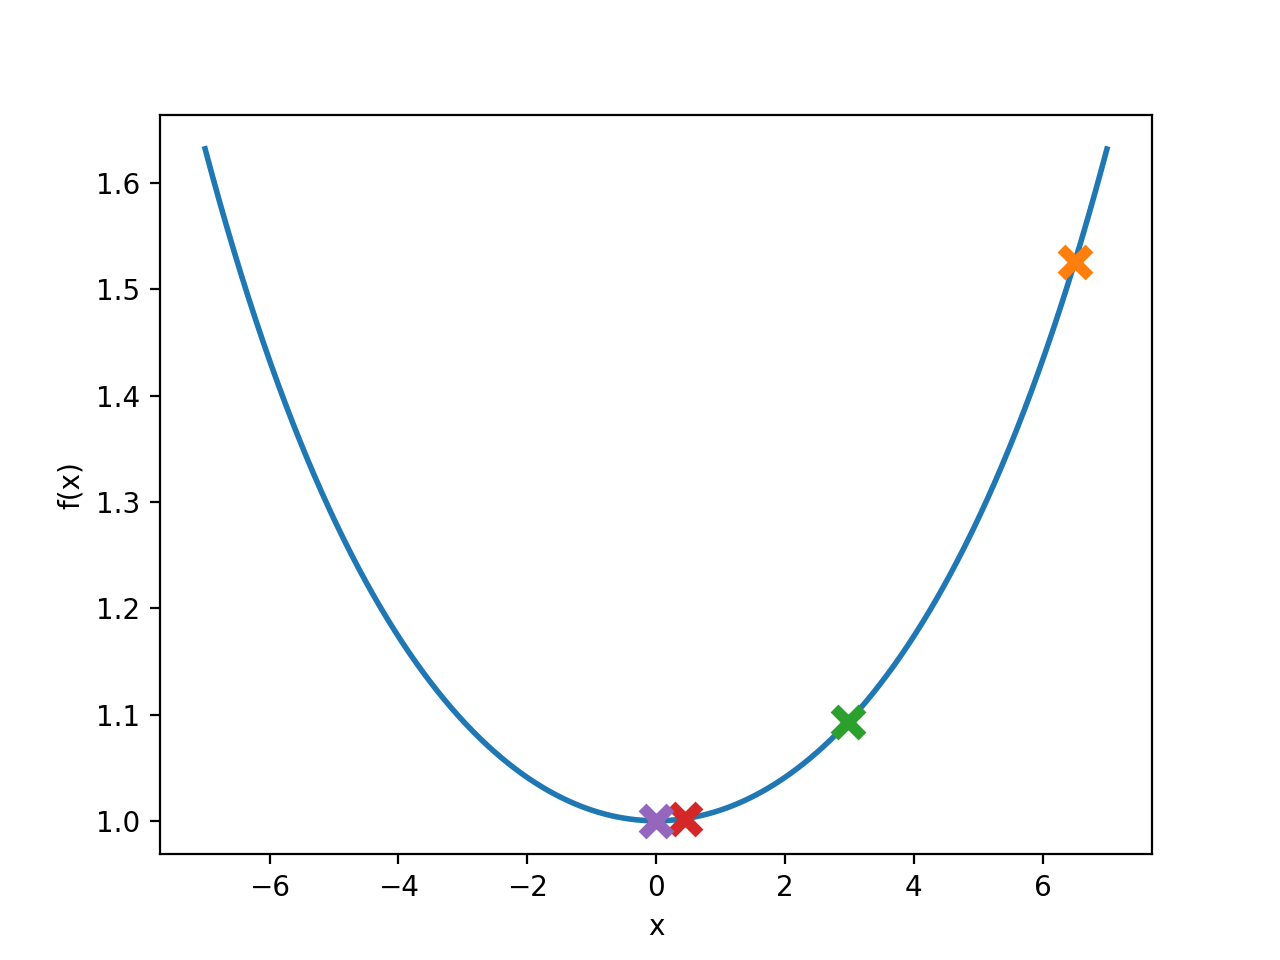

<IPython.core.display.Javascript object>


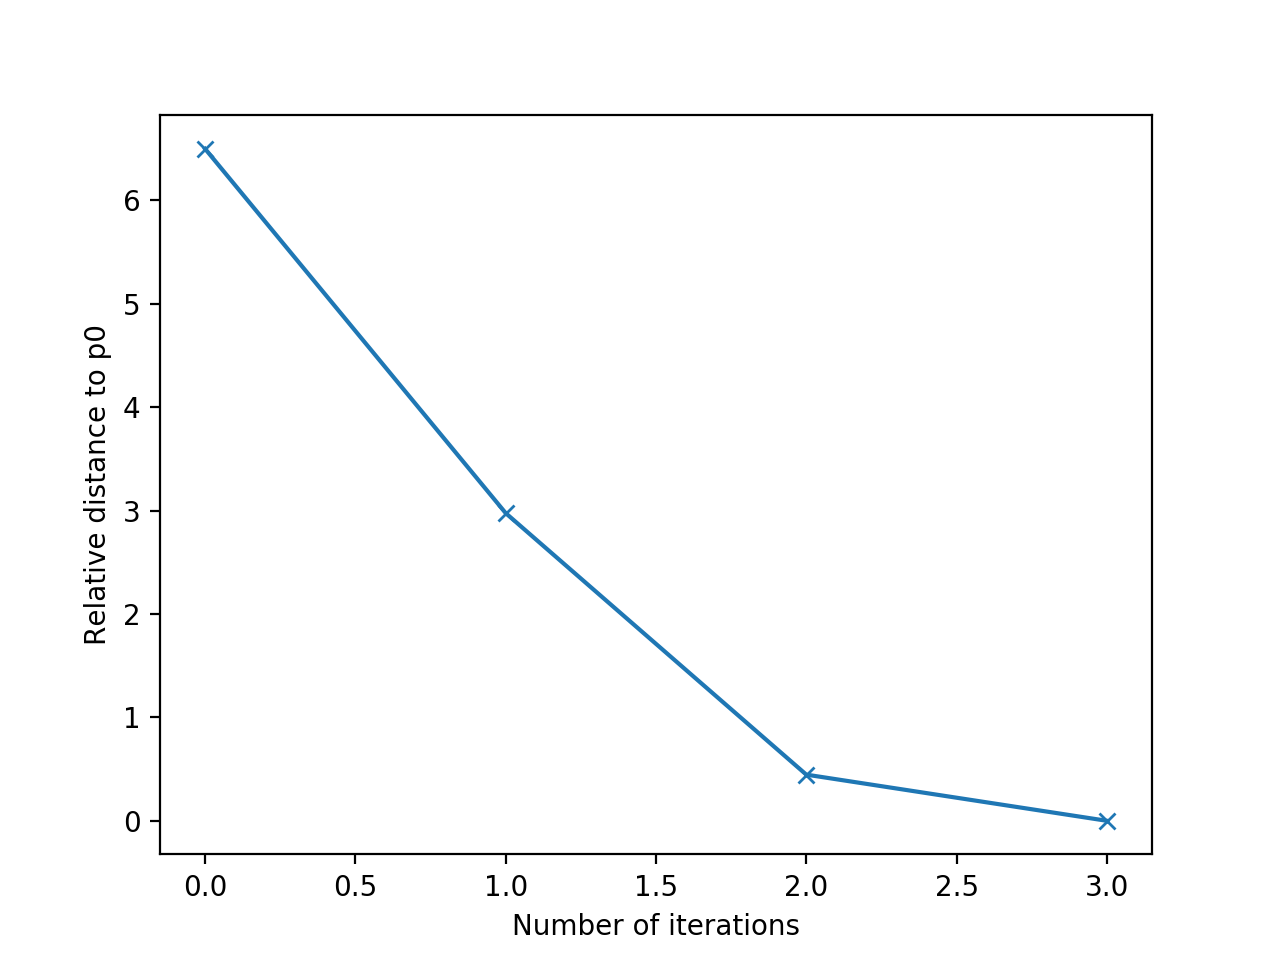

[[  6.50000000e+00]
 [  2.97696477e+00]
 [  4.48212243e-01]
 [  1.79365822e-03]]


In [4]:
f = lambda x: np.exp(x**2 / 100.)  # lambda function defining f(x)
df = lambda x: (x/50.)*np.exp(x**2 / 100.) # lambda function defining df/dx
ddf = lambda x: (1/50.+x**2/2500.)*np.exp(x**2 / 100.) # lambda function defining Hessian matrix

# initial point from which we optimize
x0 = np.array([[6.5]])
# Newton_method
x_steps = newton_method(x0, f, df, ddf)    

# we  want to plot results from x=-10 to x=10
x = np.arange(-7.,7.,0.001)
# plot results
#print(x_steps)
plot_descent1D(x_steps, x, f)
fig = compare_convergence(x_steps, x_steps[-1,:])

### Minimize the given 2D function using Newton's Method

The function minimized here is $$f(x) = \frac{1}{2} x^T \begin{bmatrix}10&1\\1&2 \end{bmatrix}x$$ and its gradient is $$\frac{df}{dx} = \begin{bmatrix}10&1\\1&2 \end{bmatrix}x$$
and its Hessian is $$H = \begin{bmatrix}10&1\\1&2 \end{bmatrix}$$
We use here lambda functions to define these functions and pass them as callable functions to our algorithms

<IPython.core.display.Javascript object>


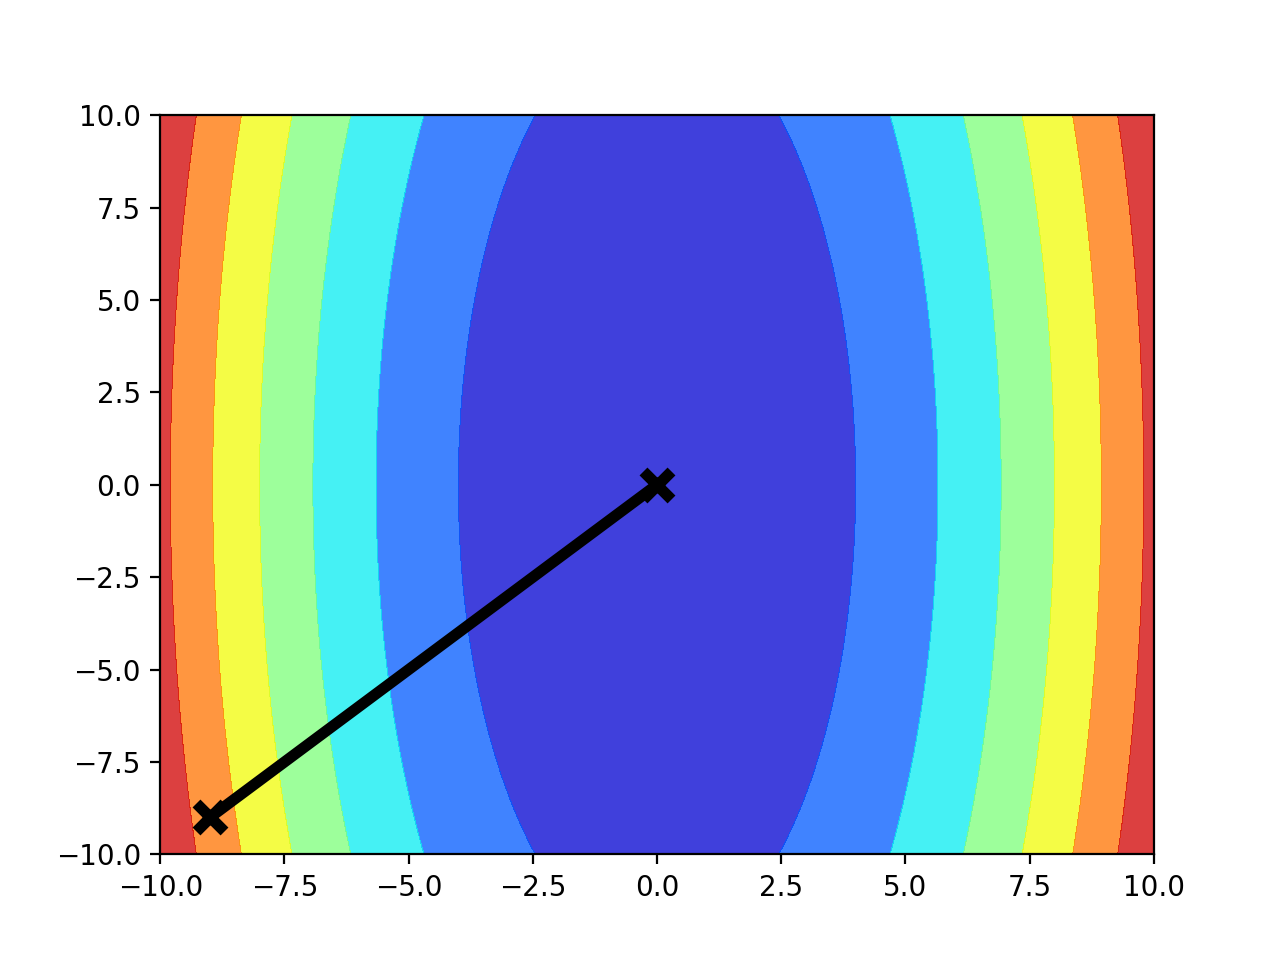

<IPython.core.display.Javascript object>


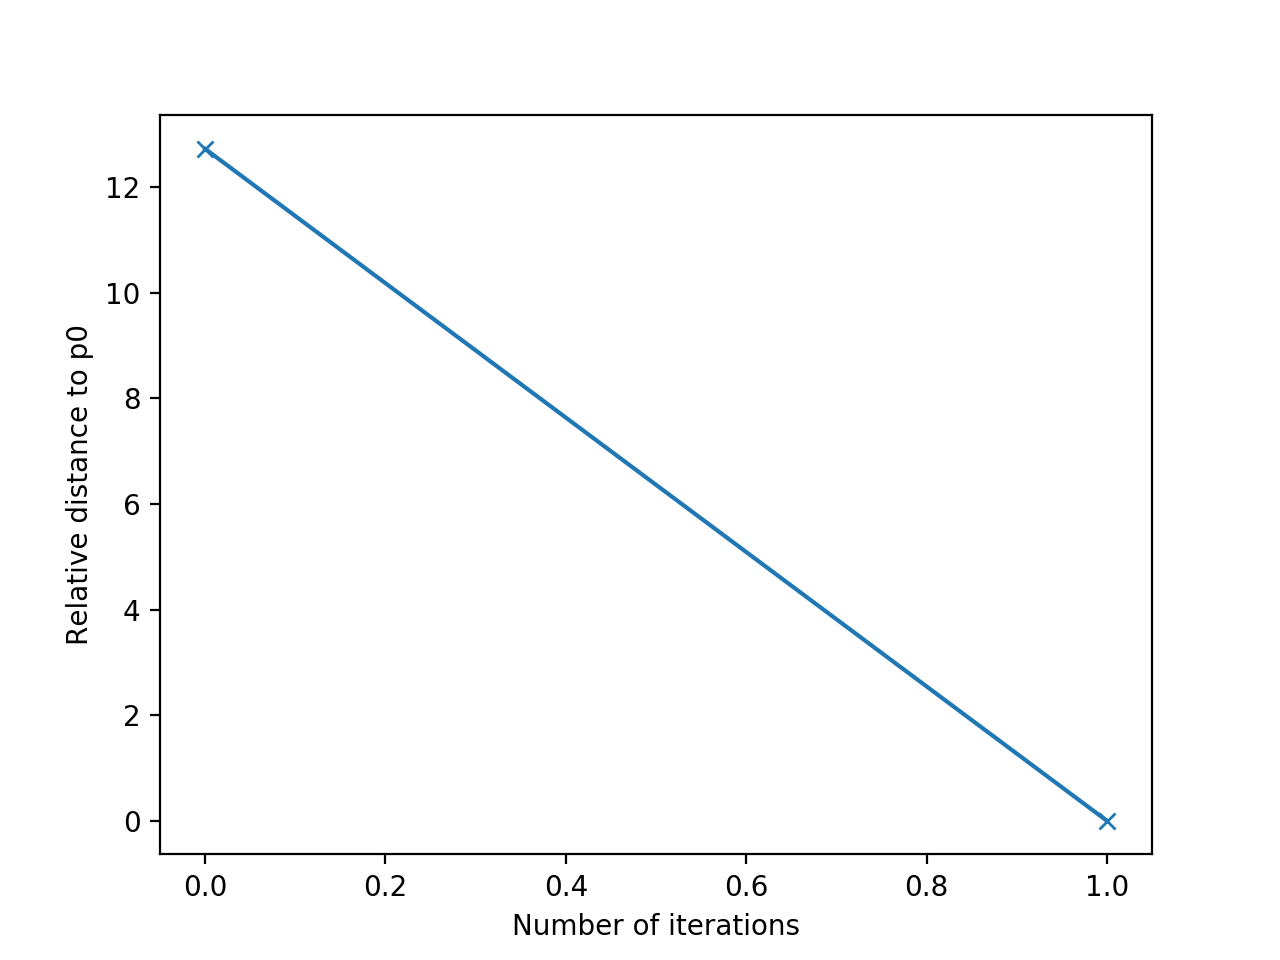

[[-9. -9.]
 [ 0.  0.]]


In [5]:
f = lambda x: 0.5*x.dot(np.array([[10,0],[0,1]])).dot(x) # lambda function defining f(x)
df = lambda x: np.array([[10,0],[0,1]]).dot(x) # lambda function defining df/dx
ddf = lambda x: np.array([[10,0],[0,1]]) # lambda function defining Hessian matrix



# initial 2D point from which we optimize
x0 = np.array([-9., -9.])  
       
# Newton's method    
x_steps = newton_method(x0, f, df, ddf) 
# we plot the results in a [-10,10]x[-10,10] box
plot_descent2D(x_steps, [-10., 10.], [-10., 10.], f)
fig = compare_convergence(x_steps, x_steps[-1,:])